## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

In [7]:
from pandas_datareader import DataReader
from datetime import datetime

df = DataReader(
    'AAPL',
    "yahoo",
    start=datetime(2017,1,1),
    end=datetime(2018,12,31)        
)
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219835
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189369


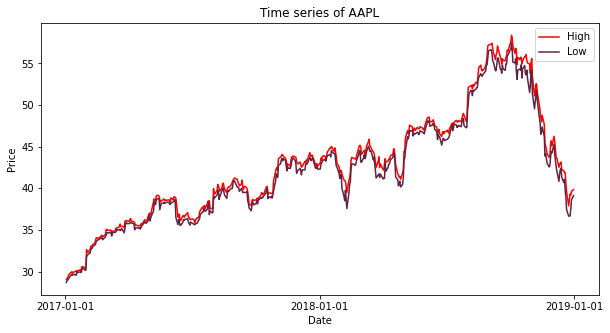

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(df["High"], c="red", label = "High")
ax.plot(df["Low"], c = "#612344", label = "Low")
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Time series of AAPL")
ax.xaxis.set_major_locator(mdates.YearLocator())

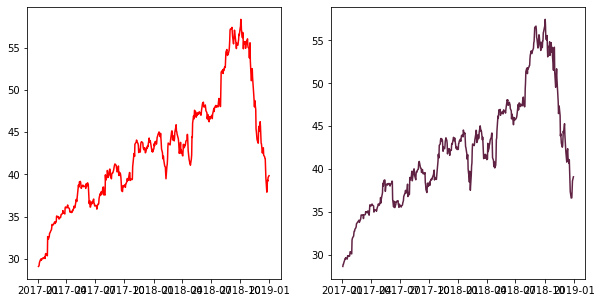

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.plot(df["High"], c="red", label = "High")
ax2.plot(df["Low"], c = "#612344", label = "Low")

Text(0.5, 1.0, 'Time series')

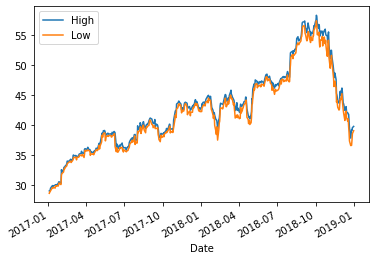

In [30]:
df[["High", "Low"]].plot.line()
ax.set_title("Time series")

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [33]:
df['year'] = df.index.year.astype(str)
df['quarter'] = df.index.quarter.astype(str)
df.head(2)

,High,Low,Open,Close,Volume,Adj Close,year,quarter
Date,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219835,2017,1
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189369,2017,1


<AxesSubplot:xlabel='High', ylabel='year'>

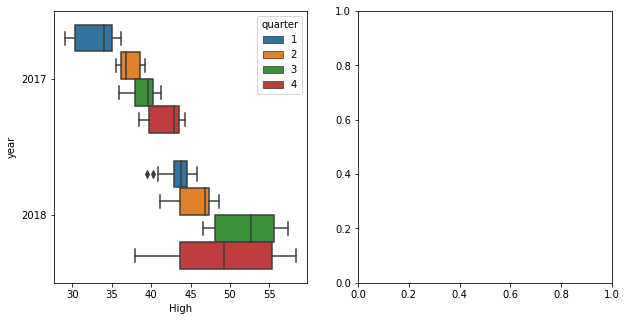

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(
    data=df,
    x="High",
    y="year",
    hue="quarter",
    ax=ax1
)

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 31.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня, по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [3]:
f = np.load('average_ratings.npy')
f

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

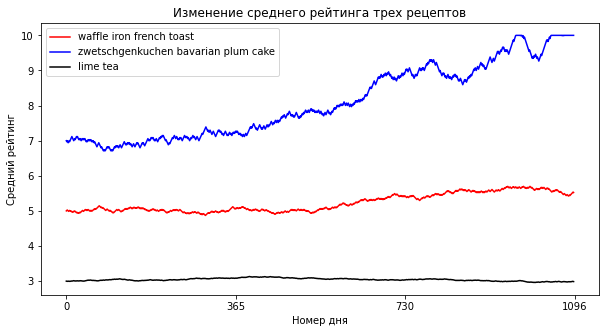

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(f[0], c="red", label = "waffle iron french toast")
ax.plot(f[1], c = "blue", label = "zwetschgenkuchen bavarian plum cake")
ax.plot(f[2], c = "black", label = "lime tea")
ax.legend()
ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.xaxis.set_major_locator(mdates.YearLocator())

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 31.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


(array([17532., 17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

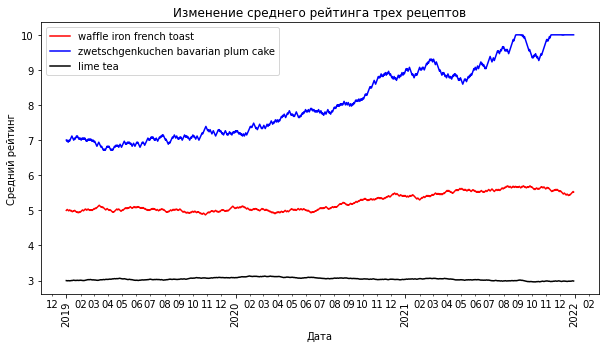

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
d = pd.date_range(start='1/1/2019', end='30/12/2021')
ax.plot(d,f[0], c="red", label = "waffle iron french toast")
ax.plot(d,f[1], c = "blue", label = "zwetschgenkuchen bavarian plum cake")
ax.plot(d,f[2], c = "black", label = "lime tea")
ax.legend()
ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")




years = mdates.YearLocator()   
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.xticks(rotation = 90)

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

(array([17897., 18017., 18140., 18262., 18383., 18506., 18628., 18748.,
        18871., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

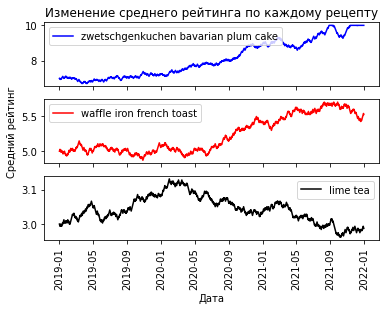

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
d = pd.date_range(start='1/1/2019', end='30/12/2021')
ax1.plot(d,f[1], c = "blue", label = "zwetschgenkuchen bavarian plum cake")
ax2.plot(d,f[0], c="red", label = "waffle iron french toast")
ax3.plot(d,f[2], c = "black", label = "lime tea")
ax1.legend()
ax2.legend()
ax3.legend()
ax3.set_xlabel("Дата")
ax2.set_ylabel("Средний рейтинг")
ax1.set_title("Изменение среднего рейтинга по каждому рецепту")

years = mdates.YearLocator()   
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.xticks(rotation = 90)

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [7]:
f1 = np.load('visitors.npy')
f1

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

Text(0, 0.5, 'Число посетителей')

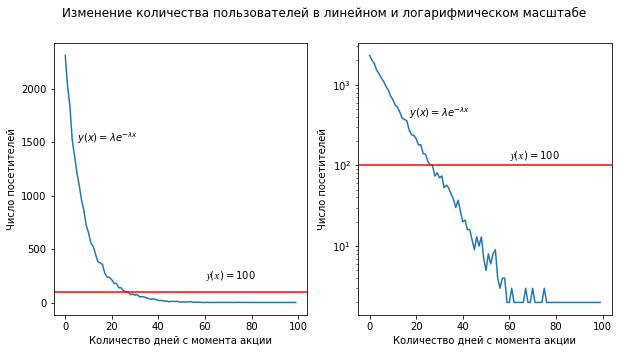

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
ax1.plot(f1)
ax1.text(5, 1500, "$y(x)=\lambda e^{-\lambda x}$", fontsize=10)
ax2.semilogy(f1)
ax2.text(17, 400, "$y(x)=\lambda e^{-\lambda x}$", fontsize=10)
ax1.axhline(y=100, color='r', linestyle='-')
ax2.axhline(y=100, color='r', linestyle='-')
ax1.text(60, 220, "$𝑦(𝑥)=100$", fontsize=10)
ax2.text(60, 120, "$𝑦(𝑥)=100$", fontsize=10)
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [55]:
recipes = pd.read_csv('recipes_sample.csv', sep = ',')
reviews = pd.read_csv('reviews_sample.csv', sep = ',')

In [56]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0, 0.5, 'Средняя длительность')

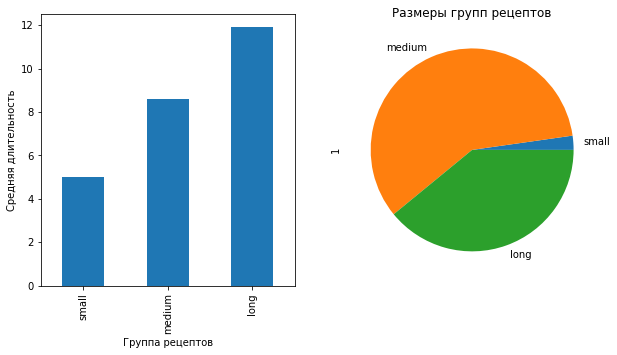

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
small = recipes[recipes["minutes"]<5]
small = small['n_steps']
medium = recipes.loc[(recipes["minutes"]>=5)&(recipes["minutes"]<50)]
medium = medium['n_steps']
long = recipes[recipes["minutes"]>=50]
long = long['n_steps']
m1 = small.mean()
m2 = medium.mean()
m3 = long.mean()
s1 = small.size
s2 = medium.size
s3 = long.size


data = {'small': [m1,s1], 'medium': [m2,s2], 'long': [m3,s3]} 
data = pd.DataFrame(data)
data1 = data.iloc[0]
data2 = data.iloc[1]
data1.plot.bar(ax=ax1)
data2.plot.pie(ax=ax2, title='Размеры групп рецептов')
ax1.set_xlabel("Группа рецептов")
ax1.set_ylabel("Средняя длительность")

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

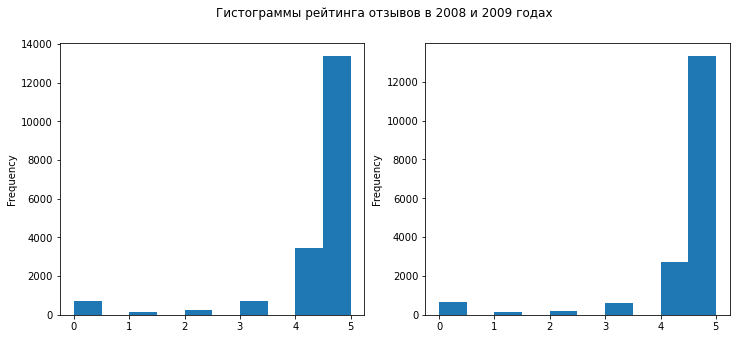

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
reviews['date'] = pd.to_datetime(reviews['date'], format="")
r1 = reviews[reviews['date'].dt.year==2008]
r2 = reviews[reviews['date'].dt.year==2009]
r1 = r1['rating']
r2 = r2['rating']
#data = pd.concat([r1, r2], axis=1, keys=['r1', 'r2'])
#data.plot.hist(by=["2008"],ax=ax1)
#data.plot.hist(by=["2008"],ax=ax1)
#data.plot.hist(by=["2009"],ax=ax2)
r1.plot.hist(ax=ax1)
r2.plot.hist(ax=ax2)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

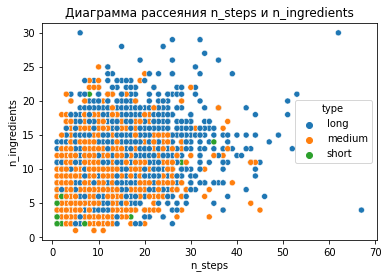

In [84]:
dd = recipes[['n_steps', 'n_ingredients']]

recipes['type'] = 'medium'
recipes['type'].where(recipes['minutes']<50, 'long', inplace=True)
recipes['type'].where(recipes['minutes']>=5, 'short', inplace=True)

sns.scatterplot(x=dd['n_steps'], y=dd['n_ingredients'], hue=recipes['type'])
plt.title("Диаграмма рассеяния n_steps и n_ingredients")

Линейная зависимость не прослеживается, так как существует множество элементов при которых большое количество шагов не равняется юольшому количеству ингредиентов и наоборот.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [158]:
df = recipes.merge(reviews, left_on='id', right_on='user_id')
df1 = df[["minutes", "n_steps", "n_ingredients", "rating"]]
cor= df1.corr()
cor

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.204885,0.080165,-0.017804
n_steps,0.204885,1.000000,0.364278,-0.037954
n_ingredients,0.080165,0.364278,1.000000,-0.046901
rating,-0.017804,-0.037954,-0.046901,1.000000


Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

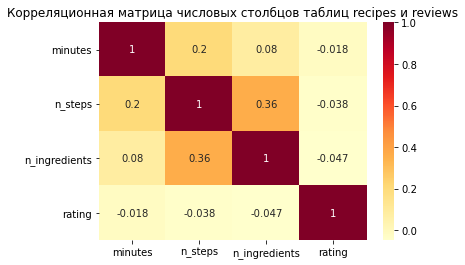

In [162]:
sns.heatmap(cor, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')